# Flight Price:

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?


In [1]:
import pandas as pd

df=pd.read_excel("flight_price.xlsx")

print("There are {} rows".format(df.shape[0]),"and {} columns".format(df.shape[1]))

There are 10683 rows and 11 columns


Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.


<AxesSubplot: xlabel='Price', ylabel='Count'>

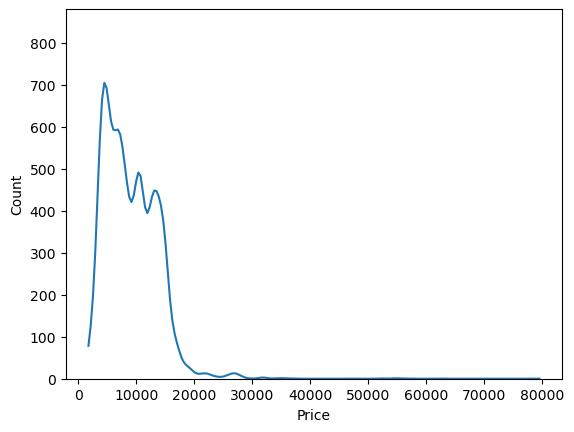

In [2]:
import seaborn as sns

sns.histplot(x=df['Price'],kde=True,shrink=0,) # Right skewed

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?


In [3]:
"""
The range of prices in the dataset (1759-79512)
so the minimum=1759,
and maximum=79512
"""
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.


<Figure size 2500x600 with 0 Axes>

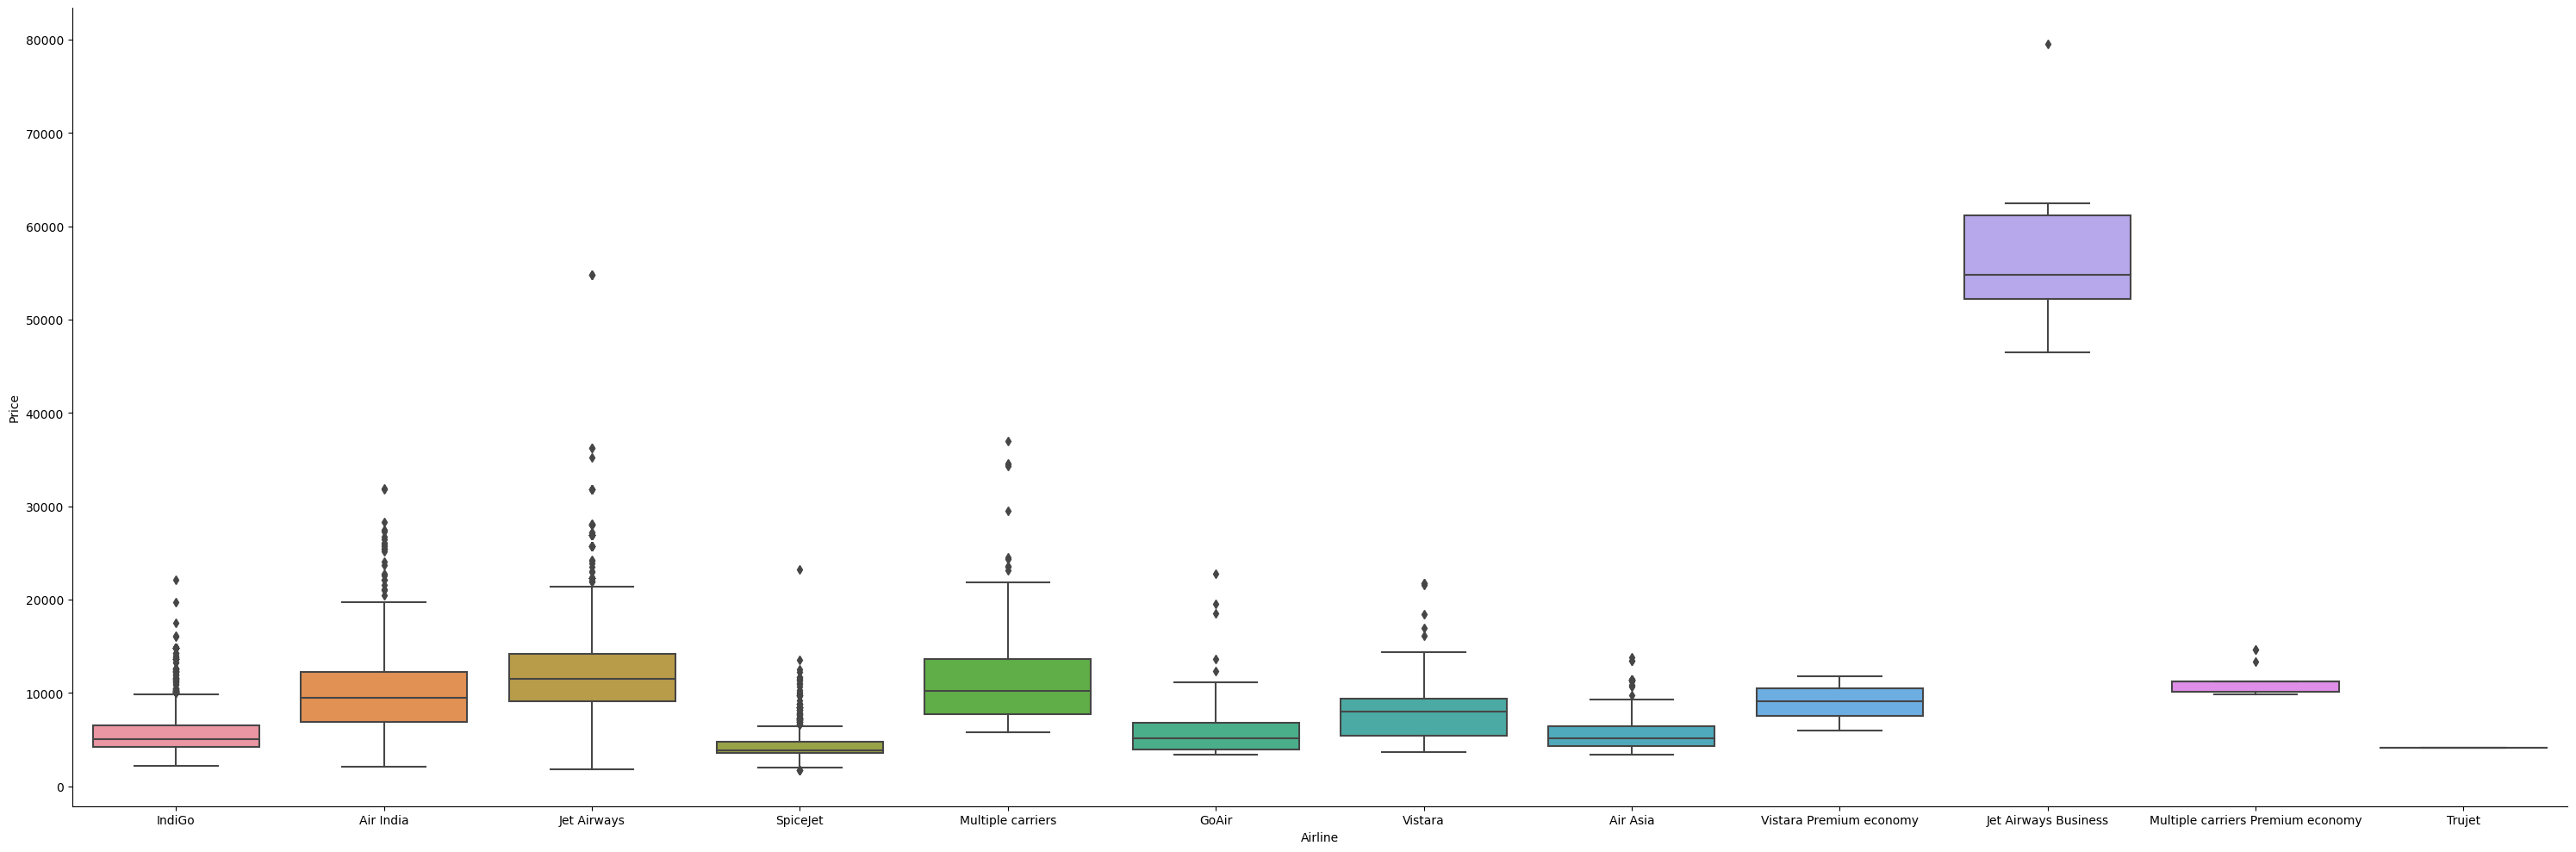

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,6))
sns.catplot(x='Airline',y='Price',data=df,kind='box',height=10,aspect=3)

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.


There are 94 Outliers Present in Price Column


<AxesSubplot: >

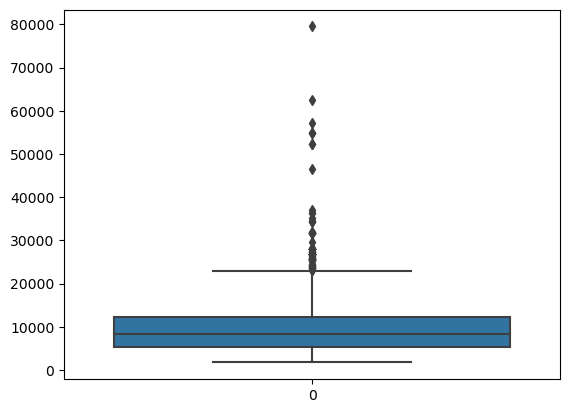

In [5]:
import numpy as np

Q1,Q3=np.percentile(df['Price'],[25,75])
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+ 1.5*IQR

outliers=[]

for i in df['Price']:
    if i<=upper_bound and i>=lower_bound:
        continue
    else:
        outliers.append(i)
        
print("There are {} Outliers Present in Price Column".format(len(outliers)))

sns.boxplot(df["Price"])

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?


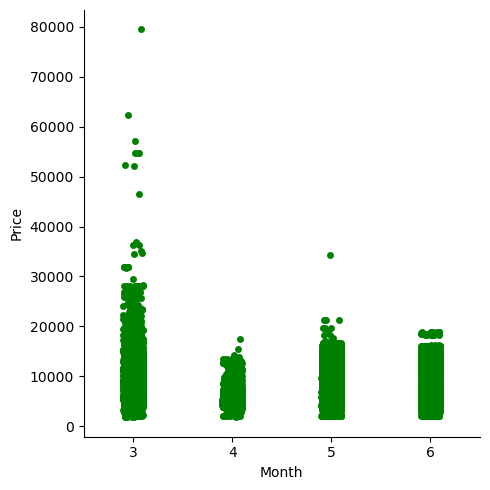

In [6]:
"""
To identify the peak travel season from the Flight Price dataset:

Features to Analyze:

->Date and Time Features (Month, Day of Week)
->Price Variation


Presentation Approach:

1-Visualize Data: Use charts to display trends in average flight prices and booking volume over different time 
periods (months or quarters).
2-Identify Peaks: Highlight months with consistent high prices and booking volume.
3-Explain Patterns: Connect your observations to factors like holidays, events, and historical trends.
4-Recommendations: Suggest strategies for capitalizing on peak travel seasons, like promotions or deals.
5-Use Visual Aids: Include graphs in your presentation to illustrate trends effectively.
6-Highlight Key Points: Summarize insights and propose actions the travel agency can take.
7-Stay Concise: Present your findings in a clear and concise manner, focusing on actionable information.
"""


df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

sns.catplot(y=df['Price'],x=df['Month'],kind='strip',color='g')

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?


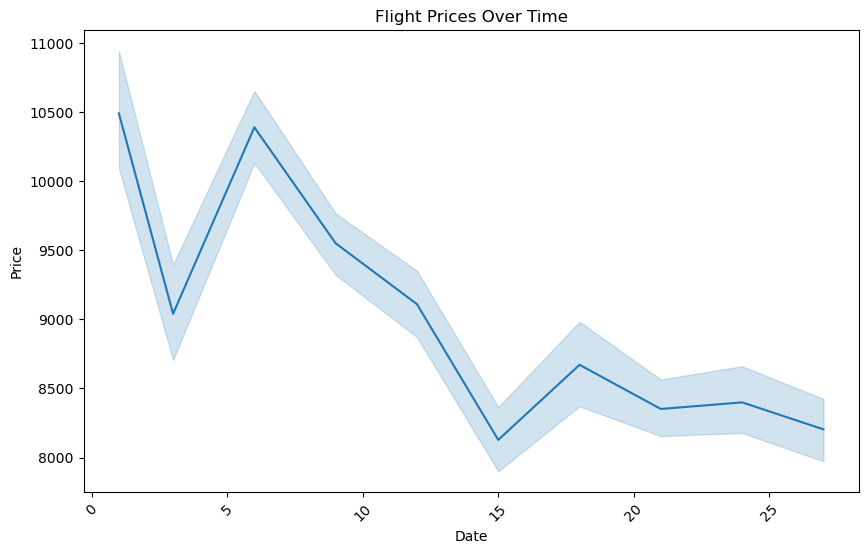

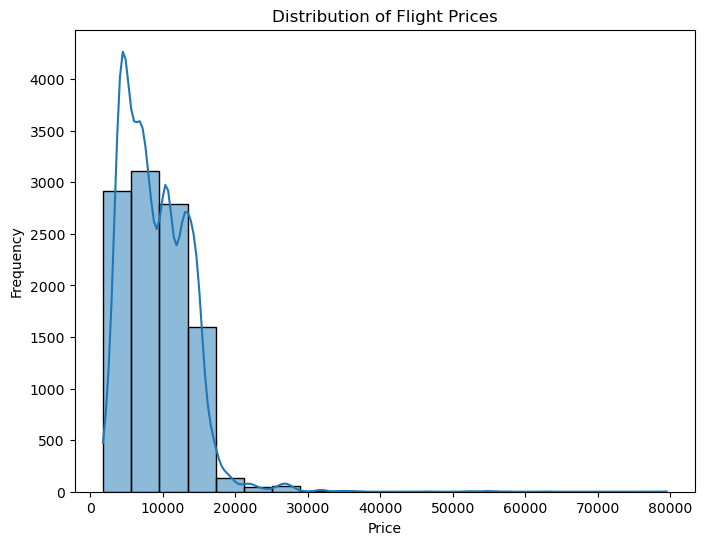

In [7]:
"""
Features to Analyze:

1-Date and Time: Analyzing flight prices over time can reveal seasonal trends, such as peak travel seasons and off-peak periods.

2-Route and Destination: Examining how prices vary between different routes and destinations can provide insights into demand and popularity.

3-Airlines: Investigating price differences between airlines can help identify which carriers tend to offer more competitive prices.

4-Duration: Examining the relationship between flight duration and price can indicate whether longer flights are more expensive.

5-Total_Stops: Investigating how the number of stops affects prices can provide insights into traveler preferences.
"""


# Analyze and visualize the data
# Example: Analyzing flight prices over time using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Price', data=df)
plt.title('Flight Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


# Example: Visualizing the distribution of flight prices using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In [ ]:
"""
As a data scientist analyzing the Flight Price dataset to identify factors affecting flight prices, your goal is to 
uncover meaningful insights that can guide pricing strategies. Here are the features you could analyze and a recommended
approach to present your findings to the management team:




Features to Analyze:

1-Route and Destination: Investigate how different routes and destinations impact flight prices. Some routes might have 
higher demand or competition, leading to varying price ranges.

2-Time Factors: Analyze the impact of time on flight prices. This includes factors such as day of the week, month, season,
and time of day.

3-Airlines: Investigate the role of different airlines in determining flight prices. Some airlines might offer premium
services at higher prices, while others focus on affordability.

4-Duration and Stops: Explore how flight duration and the number of stops influence prices. Longer flights or flights with 
more stops might have higher prices due to convenience.




Approach to Present Findings:

1-Data Exploration Summary: Begin by presenting a summary of the dataset's key statistics and characteristics, such as the
number of records, missing values, and data distribution.

2-Visualization: Utilize various visualizations to showcase insights:
 ->Time Series Plots: Display how flight prices change over time, highlighting seasonal trends and demand fluctuations.
 ->Bar Charts: Compare average prices for different routes, airlines, and classes of service.
 ->Heatmaps: Show a heatmap to visualize flight prices based on routes and months, helping identify peak travel seasons.
 ->Regression Analysis: Perform regression analysis to quantify the impact of factors like advance booking, flight duration,
 and more on flight prices.

3-Key Insights: Summarize the significant factors affecting flight prices based on your analysis. Highlight trends, correlations, 
and anomalies you've discovered.

4-Impact Analysis: Quantify the impact of each factor on flight prices. For instance, you could provide insights like "Flights booked
2-4 weeks in advance tend to have 15% lower prices."

5-Recommendations: Provide actionable recommendations based on your analysis. For example, suggest adjusting pricing strategies during
peak travel seasons or optimizing pricing for specific routes.

6-Competitor Benchmarking: Present a comparison of your company's pricing against competitors, identifying areas where you're
competitive or where adjustments might be needed.

7-Interactive Dashboards: Consider creating interactive dashboards using tools like Tableau or Power BI. This allows the management 
team to explore the data and insights on their own and ask specific questions.

8-Executive Summary: Summarize the findings in a concise executive summary, focusing on the most important takeaways and recommendations.

9-Q&A Session: Hold a presentation session where you can walk the management team through your analysis, answer questions, and provide 
additional context.
"""

# Google Playstore:

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?


In [8]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

print("There are {} rows".format(df.shape[0]),"and {} columns".format(df.shape[1]))

There are 10841 rows and 13 columns


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.


In [12]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

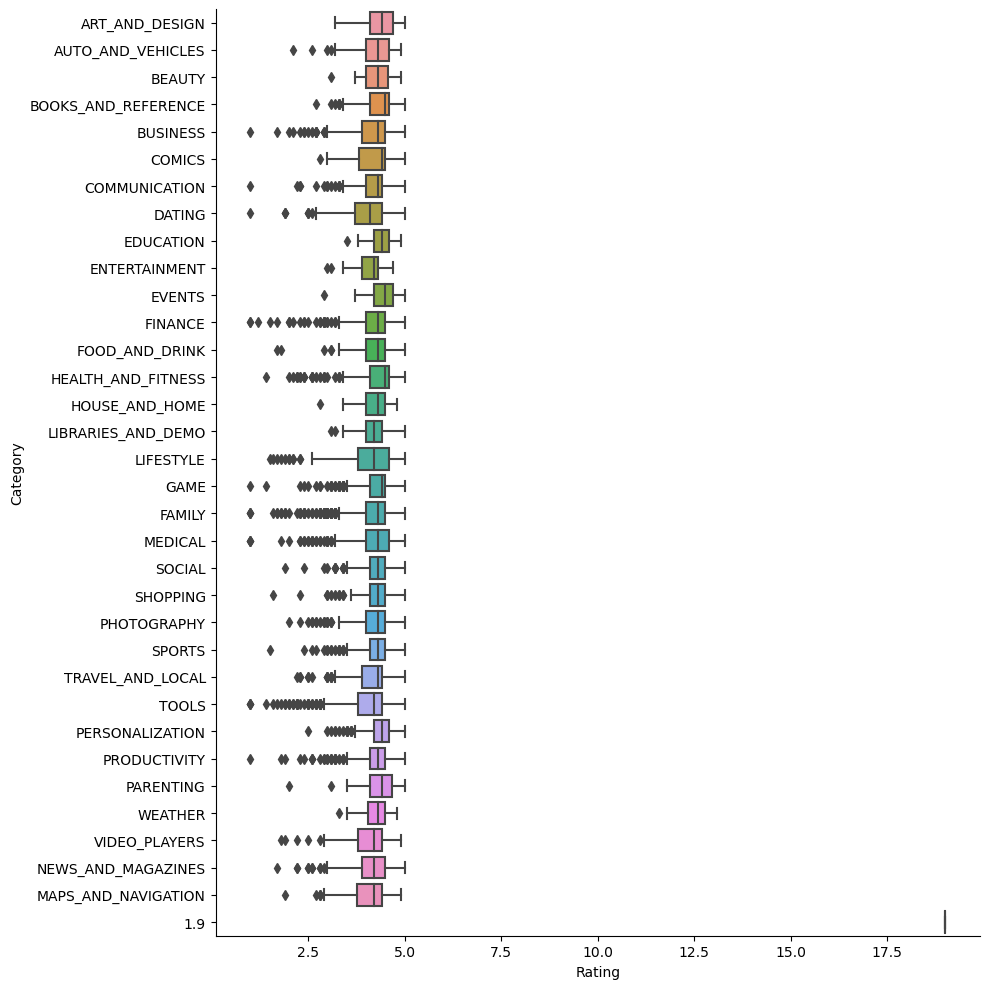

In [13]:
import seaborn as sns

sns.catplot(data=df,x='Rating',y='Category',kind='box',height=10)

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.


In [15]:
df.isnull().sum()
"""
Yes, there are 1474 missing values in rating variable ,8 missing values in Current Ver variable ,3 missing values in Android Ver
variable and 1  missing value  in both Type and Content Rating variable

Missing values can impact analysis by introducing biases, reducing the sample size, distorting relationships between 
variables, and potentially leading to inaccurate conclusions. If important features contain missing values, your analysis might
lack a complete understanding of the factors influencing flight prices. It's crucial to handle missing values appropriately 
through techniques like imputation or data removal to ensure the reliability and validity of your findings.
"""


"\nYes, there are 1474 missing values in rating variable ,8 missing values in Current Ver variable ,3 missing values in Android Ver\nvariable and 1  missing value  in both Type and Content Rating variable\n\nMissing values can impact analysis by introducing biases, reducing the sample size, distorting relationships between \nvariables, and potentially leading to inaccurate conclusions. If important features contain missing values, your analysis might\nlack a complete understanding of the factors influencing flight prices. It's crucial to handle missing values appropriately \nthrough techniques like imputation or data removal to ensure the reliability and validity of your findings.\n"

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.


In [27]:
df.drop(10472,inplace=True)

<AxesSubplot: xlabel='Size', ylabel='Rating'>

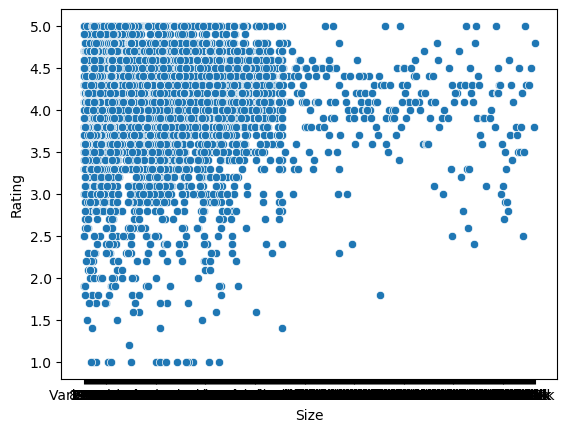

In [28]:
# Positive Relationship between Size and Rating
sns.scatterplot(data=df,x='Size',y='Rating')

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.


/tmp/ipykernel_3765/2461142243.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


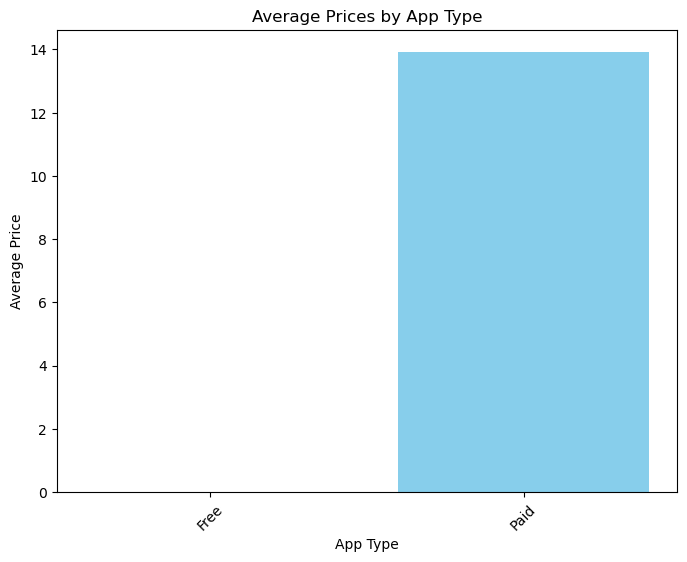

In [29]:
import matplotlib.pyplot as plt

df['Price']=df['Price'].str.replace('$','')
df['Price']=df['Price'].astype(float)


average_prices_by_type = df.groupby('Type')['Price'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(average_prices_by_type['Type'], average_prices_by_type['Price'], color='skyblue')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.title('Average Prices by App Type')
plt.xticks(rotation=45)
plt.show()


Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.


In [30]:
top_installed=df[df['Installs']==df['Installs'].max()]
print(top_installed['App'].value_counts().head(10))

Candy Crush Saga                               7
Temple Run 2                                   6
Viber Messenger                                5
Pou                                            4
Snapchat                                       4
imo free video calls and chat                  4
Google Calendar                                3
Flipboard: News For Our Time                   3
UC Browser - Fast Download Private & Secure    3
LINE: Free Calls & Messages                    3
Name: App, dtype: int64


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?


In [ ]:
"""
Approach:

Load and explore the Google Playstore dataset.
Analyze categories, ratings, installs, reviews, content rating, price, size, and genres.




Recommendations:

->Identify top categories by installs or ratings.
->Explain why these categories are popular (trends, user preferences).
->Suggest app ideas within popular categories.
->Advise on pricing, engagement strategies, and monetization.
->Analyze competitors in top categories for insights.
->Present findings visually with charts and offer actionable insights to guide the company's new app launch strategy.
"""

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?


In [ ]:
"""
Features to Analyze:

->Number of Installs
->Ratings and Reviews
->Category and Genre
->App Size and Name
->Update and Version Support
->Price 





Data Visualizations:

->Bar/Pie Charts for category/genre distribution
->Scatter Plots for installs vs. ratings
->Heatmaps for category-user engagement relationships
->Histograms for app size distribution
->Time Series Charts for growth trends
->Chord Diagrams for category relationships
->Word Clouds for user reviews



These visualizations will help you present key insights about successful app developers to the mobile app 
development company.
"""